In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
VA_data_path = 'D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/All_Data/labels.csv'
save_path = 'D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/Saves/'

In [4]:
print(f"Reading valence and arousal data from: {VA_data_path}")
df = pd.read_csv(VA_data_path)
print(df.columns)

Reading valence and arousal data from: D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/All_Data/labels.csv
Index(['Unnamed: 0', 'Valence', 'Arousal', 'Valence.1', 'Arousal.1',
       'Valence.2', 'Arousal.2', 'Valence.3', 'Arousal.3', 'Valence.4',
       'Arousal.4', 'Valence.5', 'Arousal.5', 'Valence_Mean', 'Arousal_Mean'],
      dtype='object')


In [5]:
del_VA_list = ["0491", "0838", "0907", "1511", "1595", "1752", "1803", "1809","1834","2110","2449","2726","2731","2815","2933"]
del_indices = [int(x) - 1 for x in del_VA_list]
df_dropped = df.drop(del_indices)

In [10]:
count_valence = df_dropped['Valence_Mean'].value_counts().sort_index()
count_arousal = df_dropped['Arousal_Mean'].value_counts().sort_index()

print("Valence Mean Counts:")
print(count_valence)

Valence Mean Counts:
Valence_Mean
1.833333      1
2.000000      4
2.166667      8
2.333333     14
2.500000     29
2.666667     36
2.833333     41
3.000000     60
3.166667     72
3.333333     83
3.500000     92
3.600000      1
3.666667    111
3.833333     95
4.000000    100
4.166667    100
4.333333    107
4.500000    104
4.666667     99
4.833333    112
5.000000    102
5.166667    116
5.333333    103
5.500000    125
5.666667    123
5.833333    140
6.000000    132
6.166667    116
6.333333    118
6.500000    112
6.666667    103
6.833333    115
7.000000    103
7.166667     77
7.333333     54
7.500000     34
7.666667     22
7.833333     13
8.000000      6
8.166667      2
Name: count, dtype: int64


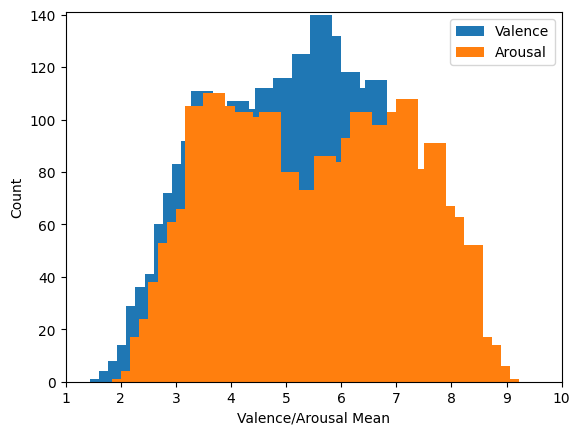

In [12]:
plt.bar(count_valence.index-0.2, count_valence.values, width=0.4, label='Valence', align='center')
plt.bar(count_arousal.index+0.2, count_arousal.values, width=0.4, label='Arousal', align='center')

plt.xlabel('Valence/Arousal Mean')
plt.ylabel('Count')
plt.title("")
plt.xticks(np.arange(1, 11, 1))
plt.ylim(0, max(count_valence.max(), count_arousal.max()) + 1)
plt.legend()
plt.show()

In [8]:

Arousal_lst = df_dropped['Arousal_Mean'].tolist()
Valence_lst = df_dropped['Valence_Mean'].tolist()


In [9]:
arousal_lst = np.array(Arousal_lst)
valence_lst = np.array(Valence_lst)

In [10]:
print(f"Number of Arousal: {len(Arousal_lst)}")
print(f"Number of Valence: {len(Valence_lst)}")

Number of Arousal: 2985
Number of Valence: 2985


In [11]:

label_lst = np.zeros(valence_lst.shape, dtype=int)
label_lst[(valence_lst <= 5) & (arousal_lst <= 5)] = 0
label_lst[(valence_lst <= 5) & (arousal_lst > 5)] = 1
label_lst[(valence_lst > 5) & (arousal_lst <= 5)] = 2
label_lst[(valence_lst > 5) & (arousal_lst > 5)] = 3


In [12]:
data_lst = np.load(save_path + "data.npy", allow_pickle=True)
rhythm_lst = np.load(save_path + "rhythm.npy", allow_pickle=True)
note_density_lst = np.load(save_path + "note_density.npy", allow_pickle=True)
chroma_lst = np.load(save_path + "chroma.npy", allow_pickle=True)

In [13]:
lists = {
    'data': data_lst,
    'rhythm': rhythm_lst,
    'note_density': note_density_lst,
    'chroma': chroma_lst,
    'label': label_lst,
    'valence': valence_lst,
    'arousal': arousal_lst
}

In [17]:
new_lists = {}
for name, lst in lists.items():
    new_lists[f'Music_VAE_{name}_lst'] = lst[:2000]  
    new_lists[f'Music_CL_{name}_lst'] = lst[2000:]  

for key, value in new_lists.items():
    np.save(os.path.join(save_path + f"{key}.npy"), value)

for key in new_lists.keys():
    print(f"{key}.npy saved successfully!")

Music_VAE_data_lst.npy saved successfully!
Music_CL_data_lst.npy saved successfully!
Music_VAE_rhythm_lst.npy saved successfully!
Music_CL_rhythm_lst.npy saved successfully!
Music_VAE_note_density_lst.npy saved successfully!
Music_CL_note_density_lst.npy saved successfully!
Music_VAE_chroma_lst.npy saved successfully!
Music_CL_chroma_lst.npy saved successfully!
Music_VAE_label_lst.npy saved successfully!
Music_CL_label_lst.npy saved successfully!
Music_VAE_valence_lst.npy saved successfully!
Music_CL_valence_lst.npy saved successfully!
Music_VAE_arousal_lst.npy saved successfully!
Music_CL_arousal_lst.npy saved successfully!


In [18]:
for key, value in new_lists.items():
    print(f"Name of the list: {key}")
    print(f"Shape of list: {np.shape(value)}")

Name of the list: Music_VAE_data_lst
Shape of list: (2000, 1057)
Name of the list: Music_CL_data_lst
Shape of list: (985, 1057)
Name of the list: Music_VAE_rhythm_lst
Shape of list: (2000,)
Name of the list: Music_CL_rhythm_lst
Shape of list: (985,)
Name of the list: Music_VAE_note_density_lst
Shape of list: (2000,)
Name of the list: Music_CL_note_density_lst
Shape of list: (985,)
Name of the list: Music_VAE_chroma_lst
Shape of list: (2000,)
Name of the list: Music_CL_chroma_lst
Shape of list: (985,)
Name of the list: Music_VAE_label_lst
Shape of list: (2000,)
Name of the list: Music_CL_label_lst
Shape of list: (985,)
Name of the list: Music_VAE_valence_lst
Shape of list: (2000,)
Name of the list: Music_CL_valence_lst
Shape of list: (985,)
Name of the list: Music_VAE_arousal_lst
Shape of list: (2000,)
Name of the list: Music_CL_arousal_lst
Shape of list: (985,)
